In [1]:
import h5py

In [2]:
# Show group structure of a single h5 data file

def print_hdf5_structure(name, obj):
    """Print the object name (path) and its type (Group or Dataset).
       Then print any attributes attached."""
    obj_type = "Group" if isinstance(obj, h5py.Group) else "Dataset"
    print(f"{name} ({obj_type})")

    # If there are attributes, print them
    for attr_name, attr_value in obj.attrs.items():
        print(f"  └─ Attribute '{attr_name}'")
        
with h5py.File('./Nb/data.h5', 'r') as f:
    f.visititems(print_hdf5_structure)

electronic (Group)
electronic/0_GPa (Group)
  └─ Attribute 'bandstructure_cols'
  └─ Attribute 'description'
  └─ Attribute 'electronic_dos_cols'
  └─ Attribute 'fermi_energy_eV'
  └─ Attribute 'kpath'
electronic/0_GPa/bandstructure (Dataset)
electronic/0_GPa/electronic_dos (Dataset)
electronic/120_GPa (Group)
  └─ Attribute 'bandstructure_cols'
  └─ Attribute 'description'
  └─ Attribute 'electronic_dos_cols'
  └─ Attribute 'fermi_energy_eV'
  └─ Attribute 'kpath'
electronic/120_GPa/bandstructure (Dataset)
electronic/120_GPa/electronic_dos (Dataset)
electronic/150_GPa (Group)
  └─ Attribute 'bandstructure_cols'
  └─ Attribute 'description'
  └─ Attribute 'electronic_dos_cols'
  └─ Attribute 'fermi_energy_eV'
  └─ Attribute 'kpath'
electronic/150_GPa/bandstructure (Dataset)
electronic/150_GPa/electronic_dos (Dataset)
electronic/30_GPa (Group)
  └─ Attribute 'bandstructure_cols'
  └─ Attribute 'description'
  └─ Attribute 'electronic_dos_cols'
  └─ Attribute 'fermi_energy_eV'
  └─ Attri

In [3]:
# Extracting data (example: Nb 30 GPa bandstructure)
import matplotlib.pyplot as plt
import pandas as pd
import json

with h5py.File('./Nb/data.h5', 'r') as file:
    group = 'electronic/30_GPa'
    
    print(file[group].attrs['description'])
    bands_arr = file[group + '/bandstructure'][:]        # <--- *very important to add [:]*, otherwise you get an HDF5 object, not the array
    bands_cols = file[group].attrs['bandstructure_cols'] # Important information pertaining to the arrays, as seen in the output of the previous cell, is stored in attributes
    fermi_e = file[group].attrs['fermi_energy_eV']       # Access attributes by using slicing the .attrs method with the right key
    kpath = json.loads(file[group].attrs['kpath'])       # We store the high-symmetry path information in a dict, that must be loaded from json before it acts like a dict
    df = pd.DataFrame(bands_arr, columns=bands_cols)     # Create a pandas dataframe from the dataset array (if you want)

Electronic data at 30 GPa: recip is given angstrom^-1, energies are given in eV (absolute), dos is given in states/eV


In [4]:
df # Nice

,recip,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,-33.400002,-8.374,-8.374,-8.374,14.758000,21.136999,21.136999,21.136999,24.490000,24.490000,35.481998,35.481998,35.481998,47.945999
1,0.004330,-33.400002,-8.374,-8.374,-8.374,14.759000,21.136999,21.136999,21.136999,24.489000,24.490000,35.483002,35.483002,35.483002,47.937000
2,0.008660,-33.400002,-8.374,-8.374,-8.374,14.761000,21.136000,21.136000,21.138000,24.486000,24.490999,35.486000,35.486000,35.487000,47.909000
3,0.012990,-33.400002,-8.375,-8.374,-8.374,14.764000,21.136000,21.136000,21.139000,24.481001,24.493000,35.492001,35.492001,35.492001,47.863998
4,0.017321,-33.398998,-8.377,-8.375,-8.375,14.768000,21.135000,21.135000,21.141001,24.473000,24.495001,35.499001,35.499001,35.500000,47.803001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,3.573430,-32.712002,-9.722,-9.722,-9.718,16.294001,16.294001,27.299999,27.357000,27.357000,31.150000,31.150000,31.181000,42.118000,44.056000
825,3.577765,-32.710999,-9.721,-9.721,-9.719,16.290001,16.290001,27.330999,27.363001,27.363001,31.142000,31.142000,31.160000,42.106998,44.062000
826,3.582100,-32.710999,-9.721,-9.721,-9.720,16.288000,16.288000,27.353001,27.368000,27.368000,31.136000,31.136000,31.143999,42.098999,44.067001
827,3.586435,-32.710999,-9.721,-9.721,-9.721,16.287001,16.287001,27.367001,27.370001,27.370001,31.132999,31.132999,31.135000,42.094002,44.070000


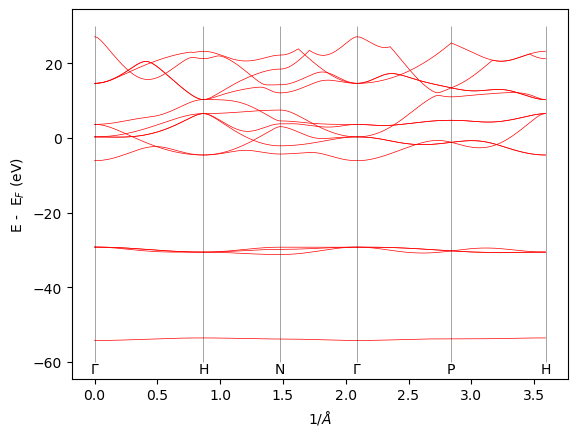

In [5]:
num_bands = len(df.columns)-1

# Plot each band, subtract the Fermi energy, so that the Fermi energy coincides with 0 energy
for i in range(num_bands):
    plt.plot(df['recip'], df[f'{i}'] - fermi_e, c='r', lw=0.5)

# Add vlines to denote high-symmetry points
for i, sym in enumerate(kpath['path_symbols']): 
    x_sym = df['recip'].iloc[kpath['path_idx_wrt_kpt'][i]] # reference the correct point along the recip to place the line using the kpath dictionary
    plt.vlines(x=x_sym, ymin=-60, ymax=30, colors='k', alpha=0.5, lw=0.5) 
    plt.text(x=x_sym, y=-63, s=sym, ha='center')
    plt.ylabel('E -  E$_{F}$ (eV)')
    plt.xlabel('1/$\\AA$')